In [1]:
import xgboost as xgb
import databento_sqlmod1 as dbs
import fmp_keymetrics
import combiner

In [2]:
ticker_list = ['AAPL', 'MSFT', 'NVDA',  # Technology
    'AMZN', 'TSLA', 'HD',  # Consumer Discretionary
    'UNH', 'JNJ', 'LLY',  # Healthcare
    'JPM', 'BAC', 'WFC',  # Financials
    'XOM', 'CVX', 'COP',  # Energy
    'PG', 'KO', 'PEP',  # Consumer Staples
    'BA', 'CAT', 'UPS',  # Industrials
    'LIN', 'APD', 'SHW',  # Materials
    'PLD', 'AMT', 'CCI',  # Real Estate
    'NEE', 'DUK', 'SO',  # Utilities
]

In [3]:
# Databento download
for ticker in ticker_list:
    dbs.download_and_append_data(ticker, '2019-01-01', '2023-12-31', frequency='daily')

Ticker AAPL already up-to-date
data/equity/usa/daily/aapl.csv has been successfully zipped into data/equity/usa/daily/aapl.zip.
Data for AAPL fetched from postgres, converted to LEAN format.
Ticker MSFT already up-to-date
data/equity/usa/daily/msft.csv has been successfully zipped into data/equity/usa/daily/msft.zip.
Data for MSFT fetched from postgres, converted to LEAN format.
Ticker NVDA already up-to-date
data/equity/usa/daily/nvda.csv has been successfully zipped into data/equity/usa/daily/nvda.zip.
Data for NVDA fetched from postgres, converted to LEAN format.
Ticker AMZN already up-to-date
data/equity/usa/daily/amzn.csv has been successfully zipped into data/equity/usa/daily/amzn.zip.
Data for AMZN fetched from postgres, converted to LEAN format.
Ticker TSLA already up-to-date
data/equity/usa/daily/tsla.csv has been successfully zipped into data/equity/usa/daily/tsla.zip.
Data for TSLA fetched from postgres, converted to LEAN format.
Ticker HD already up-to-date
data/equity/usa/

In [4]:
#FMP Download
start_date = '2019-01-01'
end_date = '2024-09-31'

fmp = fmp_keymetrics.funda_ETL()
keymetrics = fmp.download_funda_data(ticker_list, start=start_date, end=end_date)
keymetrics

Key Metrics for AAPL:
[{'symbol': 'AAPL', 'date': '2024-06-29', 'calendarYear': '2024', 'period': 'Q3', 'revenuePerShare': 5.610916249926983, 'netIncomePerShare': 1.40297436059123, 'operatingCashFlowPerShare': 1.8876834249320082, 'freeCashFlowPerShare': 1.7469804293318714, 'cashPerShare': 4.042578257128804, 'bookValuePerShare': 4.363559009992529, 'tangibleBookValuePerShare': 4.363559009992529, 'shareholdersEquityPerShare': 4.363559009992529, 'interestDebtPerShare': 6.626581248849961, 'marketCap': 3219857673020, 'enterpriseValue': 3295596673020, 'peRatio': 37.53097809842409, 'priceToSalesRatio': 37.53754121757581, 'pocfratio': 111.57591215676763, 'pfcfRatio': 120.5623122409855, 'pbRatio': 48.26793897313666, 'ptbRatio': 48.26793897313666, 'evToSales': 38.420516840411764, 'enterpriseValueOverEBITDA': 116.85684252960783, 'evToOperatingCashFlow': 114.20045301198974, 'evToFreeCashFlow': 123.39823540719661, 'earningsYield': 0.006661163994830643, 'freeCashFlowYield': 0.00829446600195552, 'debt

,symbol,period_ending,calendarYear,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,AAPL,2024-06-29,2024,Q3,5.610916,1.402974,1.887683,1.746980,4.042578,4.363559,...,46663500000,6.198500e+09,45.297457,92.879672,12.036053,1.986866,0.968996,7.477534,0.321521,0.140703
1,AAPL,2024-03-30,2024,Q2,5.890812,1.534222,1.472817,1.343255,4.358732,4.815961,...,51949500000,6.371500e+09,40.808568,84.933996,11.568830,2.205419,1.059646,7.779525,0.318570,0.129561
2,AAPL,2023-12-30,2024,Q1,7.709660,2.186752,2.572251,2.418025,4.713160,4.777636,...,60378500000,6.421000e+09,37.710056,80.858158,9.054234,2.386631,1.113060,9.940101,0.457706,0.154225
3,AAPL,2023-09-30,2023,Q4,5.737259,1.471592,1.384537,1.245879,3.945977,3.983862,...,54655000000,6.841000e+09,61.327069,114.833405,11.611542,1.467541,0.783744,7.750908,0.369388,0.138659
4,AAPL,2023-07-01,2023,Q3,5.210792,1.266498,1.680510,1.547178,3.980350,3.839692,...,44822000000,7.416500e+09,43.115762,92.607747,14.577604,2.087404,0.971841,6.173854,0.329844,0.133332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,SO,2019-12-31,2019,Q4,4.671097,0.423003,0.855512,-1.176805,1.877374,30.465742,...,2411500000,2.356000e+09,62.435897,72.573321,67.776727,1.441478,1.240125,1.327889,0.016009,2.032317
19,SO,2019-09-30,2019,Q3,5.720420,1.259542,2.259542,0.415076,2.796756,30.612595,...,2318500000,2.233500e+09,50.817348,72.550694,74.407684,1.771049,1.240512,1.209552,0.047475,1.844466
20,SO,2019-06-30,2019,Q2,4.877388,0.862967,1.692448,-0.035399,1.323152,30.062236,...,2470000000,2.118000e+09,59.546881,78.858093,71.274945,1.511414,1.141291,1.262716,0.033175,1.727847
21,SO,2019-03-31,2019,Q1,5.213873,2.011561,0.716763,-0.899807,1.311175,29.843931,...,3002500000,2.243500e+09,61.347007,73.727679,60.066964,1.467064,1.220708,1.498328,0.078120,1.616570


In [5]:
# Merge Databento and FMP data
comb = combiner.combine_pvol_funda()
#tickers = ['AAPL','AMZN','GOOGL','MSFT']
merged = comb.merge_pvol_funda(ticker_list)

PriceVol data loaded for AAPL
Fundamental data loaded for AAPL
Price-volume fundamental data for AAPL saved to table comb_pvol_funda.AAPL
PriceVol data loaded for MSFT
Fundamental data loaded for MSFT
Price-volume fundamental data for MSFT saved to table comb_pvol_funda.MSFT
PriceVol data loaded for NVDA
Fundamental data loaded for NVDA
Price-volume fundamental data for NVDA saved to table comb_pvol_funda.NVDA
PriceVol data loaded for AMZN
Fundamental data loaded for AMZN
Price-volume fundamental data for AMZN saved to table comb_pvol_funda.AMZN
PriceVol data loaded for TSLA
Fundamental data loaded for TSLA
Price-volume fundamental data for TSLA saved to table comb_pvol_funda.TSLA
PriceVol data loaded for HD
Fundamental data loaded for HD
Price-volume fundamental data for HD saved to table comb_pvol_funda.HD
PriceVol data loaded for UNH
Fundamental data loaded for UNH
Price-volume fundamental data for UNH saved to table comb_pvol_funda.UNH
PriceVol data loaded for JNJ
Fundamental data 

In [6]:
import pandas as pd
import numpy as np
import ta  # ta-lib or ta for calculating technical indicators
import xgboost as xgb
import combiner

# Initialize combiner instance
comb = combiner.combine_pvol_funda()

def add_technical_indicators(df):
    # Add SMA, EMA
    df['sma_20'] = ta.trend.sma_indicator(df['close'], window=20)
    df['sma_50'] = ta.trend.sma_indicator(df['close'], window=50)
    df['ema_20'] = ta.trend.ema_indicator(df['close'], window=20)
    
    # Add RSI, MACD
    df['rsi_14'] = ta.momentum.rsi(df['close'], window=14)
    df['macd'] = ta.trend.macd(df['close'])
    df['macd_signal'] = ta.trend.macd_signal(df['close'])

    # Add Bollinger Bands
    bollinger = ta.volatility.BollingerBands(df['close'], window=20)
    df['bb_upper'] = bollinger.bollinger_hband()
    df['bb_lower'] = bollinger.bollinger_lband()
    
    # Add Average True Range (ATR)
    df['atr_14'] = ta.volatility.average_true_range(df['high'], df['low'], df['close'], window=14)
    
    # Add On-Balance Volume (OBV)
    df['obv'] = ta.volume.on_balance_volume(df['close'], df['volume'])
    
    # Add Stochastic Oscillator (K, D)
    stoch = ta.momentum.stoch(df['high'], df['low'], df['close'], window=14, smooth_window=3)
    df['stoch_k'] = stoch
    df['stoch_d'] = ta.momentum.stoch_signal(df['high'], df['low'], df['close'], window=14, smooth_window=3)
    
    # Remove momentum since it was causing an error
    # Add Williams %R
    df['williams_r'] = ta.momentum.williams_r(df['high'], df['low'], df['close'], lbp=14)
    
    # Add Chaikin Money Flow (CMF)
    df['cmf'] = ta.volume.chaikin_money_flow(df['high'], df['low'], df['close'], df['volume'], window=20)
    
    return df

def prepdata(ticker, start_date, end_date):
    # Retrieve data for the ticker and date range
    data = comb.get_comb_data_from_postgresql(ticker, start_date, end_date)

    # Create a DataFrame
    df = pd.DataFrame(data)

    # Sort the data by date
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(by='date')

    # Add technical indicators
    df = add_technical_indicators(df)

    # Calculate log returns as the target variable
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))

    # Drop rows with NaN values in log returns and technical indicators
    df = df.dropna()

    # Define the fundamental columns and technical indicators to use as features
    fundamental_columns = [
        'revenuePerShare', 'netIncomePerShare', 'operatingCashFlowPerShare', 'freeCashFlowPerShare', 
        'cashPerShare', 'bookValuePerShare', 'tangibleBookValuePerShare', 'shareholdersEquityPerShare', 
        'interestDebtPerShare', 'marketCap', 'enterpriseValue', 'peRatio', 'priceToSalesRatio', 
        'pocfratio', 'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales', 'enterpriseValueOverEBITDA', 
        'evToOperatingCashFlow', 'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield', 
        'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio', 'interestCoverage', 
        'incomeQuality', 'dividendYield', 'payoutRatio', 'salesGeneralAndAdministrativeToRevenue', 
        'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets', 'capexToOperatingCashFlow', 
        'capexToRevenue', 'capexToDepreciation', 'stockBasedCompensationToRevenue', 'grahamNumber', 
        'roic', 'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital', 'tangibleAssetValue', 
        'netCurrentAssetValue', 'investedCapital', 'averageReceivables', 'averagePayables', 
        'averageInventory', 'daysSalesOutstanding', 'daysPayablesOutstanding', 
        'daysOfInventoryOnHand', 'receivablesTurnover', 'payablesTurnover', 'inventoryTurnover', 
        'roe', 'capexPerShare'
    ]
    
    # Technical columns added
    technical_columns = [
        'sma_20', 'sma_50', 'ema_20', 'rsi_14', 'macd', 'macd_signal', 'bb_upper', 'bb_lower', 
        'atr_14', 'obv', 'stoch_k', 'stoch_d', 'williams_r', 'cmf'
    ]

    # Fill missing values in the fundamental columns using forward fill, followed by zeros if necessary
    df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)

    # Define features (X) and target (y)
    X = df[fundamental_columns + technical_columns]
    y = df['log_return']

    # Convert features into an XGBoost DMatrix
    dmat = xgb.DMatrix(X, label=y, missing=np.nan)

    return dmat, y, X

# Example of how to use the updated function
#ticker_list = ['AAPL']
for ticker in ticker_list:
    start_date = '2019-01-01'
    end_date = '2022-12-31'

    # Prepare the training data using log returns
    dtrain, y_train, X_train = prepdata(ticker, start_date, end_date)

    ''' Setting Test Data '''
    start_date = '2023-01-01'
    end_date = '2023-12-31'

    # Prepare the test data
    dtest, y_test, X_test = prepdata(ticker, start_date, end_date)


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)
C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)
C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)
C:\Users\MP\AppData\Local

In [7]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
from tqdm import tqdm  # Import tqdm for progress bar

# Combine training data for multiple tickers
tickers = ticker_list #tickerlist defined at the top of file
X_combined = []
y_combined = []

# Loop through tickers with progress bar
for ticker in tqdm(tickers, desc="Processing tickers"):
    dtrain, y_train, X_train = prepdata(ticker, '2019-01-01', '2022-12-31')
    X_combined.append(X_train)
    y_combined.append(y_train)

X_combined = pd.concat(X_combined)
y_combined = np.concatenate(y_combined)

# Initialize model and parameter grid
xgb_regressor = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'subsample': [0.8],
    'colsample_bytree': [0.7, 0.8],
    'alpha': [0.1],
    'lambda': [0.1]
}

# Use TimeSeriesSplit for time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=tscv, scoring='r2', verbose=1)
grid_search.fit(X_combined, y_combined)

# Print the best parameters and R² score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R² Score: {grid_search.best_score_}")


Processing tickers:   0%|          | 0/30 [00:00<?, ?it/s]C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)
Processing tickers:   3%|▎         | 1/30 [00:00<00:06,  4.39it/s]C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)
Processing tickers:   7%|▋         | 2/30 [00:00<00:06,  4.30it/s]C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'alpha': 0.1, 'colsample_bytree': 0.8, 'lambda': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best R² Score: 0.3946600827811203


In [8]:
import joblib

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'xgb_best_model.pkl')


['xgb_best_model.pkl']

In [9]:
# Load the saved model
best_model = joblib.load('xgb_best_model.pkl')


In [10]:
# Test the model on new tickers
#new_tickers = ['MSFT', 'GOOG', 'AMZN']  # Example tickers

for ticker in ticker_list:
    # Prepare data for the new ticker
    dtrain, y_train, X_train = prepdata(ticker, '2019-01-01', '2022-12-31')
    
    # Use the saved model to make predictions
    y_pred = best_model.predict(X_train)
    
    # Evaluate model performance
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    print(f"Performance on {ticker}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")
    print('---')


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on AAPL:
MAE: 0.010657280699010603
MSE: 0.00037526202591214663
R²: 0.8437153142562837
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)
C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on MSFT:
MAE: 0.008590097771808674
MSE: 0.00016334083034455678
R²: 0.5687466845124849
---
Performance on NVDA:
MAE: 0.0176413149906086
MSE: 0.0009030613447724581
R²: 0.7152710799489919
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on AMZN:
MAE: 0.011795866266487055
MSE: 0.00097014227203317
R²: 0.9006117757495185
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on TSLA:
MAE: 0.023616065903998035
MSE: 0.0013066846762331264
R²: 0.7602206227971915
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on HD:
MAE: 0.008040456450407272
MSE: 0.00017481392255756212
R²: 0.5129293622001118
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on UNH:
MAE: 0.008125261508538673
MSE: 0.00017278900618272205
R²: 0.5179695273018707
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on JNJ:
MAE: 0.005496376746276928
MSE: 7.295790525543348e-05
R²: 0.5752345149158287
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on LLY:
MAE: 0.008762143548011
MSE: 0.0002019841802803793
R²: 0.5118632793869426
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on JPM:
MAE: 0.009149374493499068
MSE: 0.0002086526137168962
R²: 0.5120988381818674
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on BAC:
MAE: 0.01058799990045791
MSE: 0.000263970680010294
R²: 0.5017011591399136
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on WFC:
MAE: 0.011814055768455636
MSE: 0.0003203411437691773
R²: 0.4981058051950069
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on XOM:
MAE: 0.01112072780864645
MSE: 0.0002554748812809493
R²: 0.5097150466956388
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on CVX:
MAE: 0.010384111844012082
MSE: 0.00028901088294168957
R²: 0.46541873884924734
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on COP:
MAE: 0.014547045718250927
MSE: 0.00048231302184592416
R²: 0.4479582131348734
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on PG:
MAE: 0.005873355284959641
MSE: 9.049945120569165e-05
R²: 0.5688904948006577
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on KO:
MAE: 0.006008964612859914
MSE: 9.335578871358892e-05
R²: 0.4841282712061874
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on PEP:
MAE: 0.005737607837821636
MSE: 9.28179835999123e-05
R²: 0.5395838941945901
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)
C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on BA:
MAE: 0.015475235787178191
MSE: 0.0006765736253497843
R²: 0.44153630880081884
---
Performance on CAT:
MAE: 0.00999169619129688
MSE: 0.00021472024746574923
R²: 0.5174672742984776
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on UPS:
MAE: 0.008951032557025172
MSE: 0.00019624531381675668
R²: 0.5145721594905039
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on LIN:
MAE: 0.007988183598426396
MSE: 0.00014209268007440813
R²: 0.559008185687858
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on APD:
MAE: 0.008467572436725496
MSE: 0.0001853915148741784
R²: 0.5142429543984651
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on SHW:
MAE: 0.009194673922153063
MSE: 0.0002795453614005663
R²: 0.8293856587282377
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on PLD:
MAE: 0.009114489251651694
MSE: 0.00021244633879644013
R²: 0.5100881415500644
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on AMT:
MAE: 0.008386193309042741
MSE: 0.00016884918797085833
R²: 0.5409294472112713
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on CCI:
MAE: 0.008338309903463017
MSE: 0.0001673902469975264
R²: 0.545290022178764
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on NEE:
MAE: 0.008782751598793454
MSE: 0.0003558159817835232
R²: 0.849371196552335
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


Performance on DUK:
MAE: 0.006608495336287914
MSE: 0.00011870214863700954
R²: 0.5191406477182491
---
Performance on SO:
MAE: 0.00705848145124329
MSE: 0.00015106162182581395
R²: 0.49335852529964885
---


C:\Users\MP\AppData\Local\Temp\ipykernel_18220\304463306.py:91: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[fundamental_columns + technical_columns] = df[fundamental_columns + technical_columns].fillna(method='ffill').fillna(0)


c:\Users\MP\anaconda3\envs\algo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\MP\anaconda3\envs\algo\lib\site-packages\shap\plots\colors\_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
c:\Users\MP\anaconda3\envs\algo\lib\site-packages\shap\plots\colors\_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if np.issubdtype(dtype_in, np.dtype(dtype).type):
c:\Users\MP\anaconda3\envs\algo\lib\site-packages\shap\plots\colors\_colorconv.py:819: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is depre

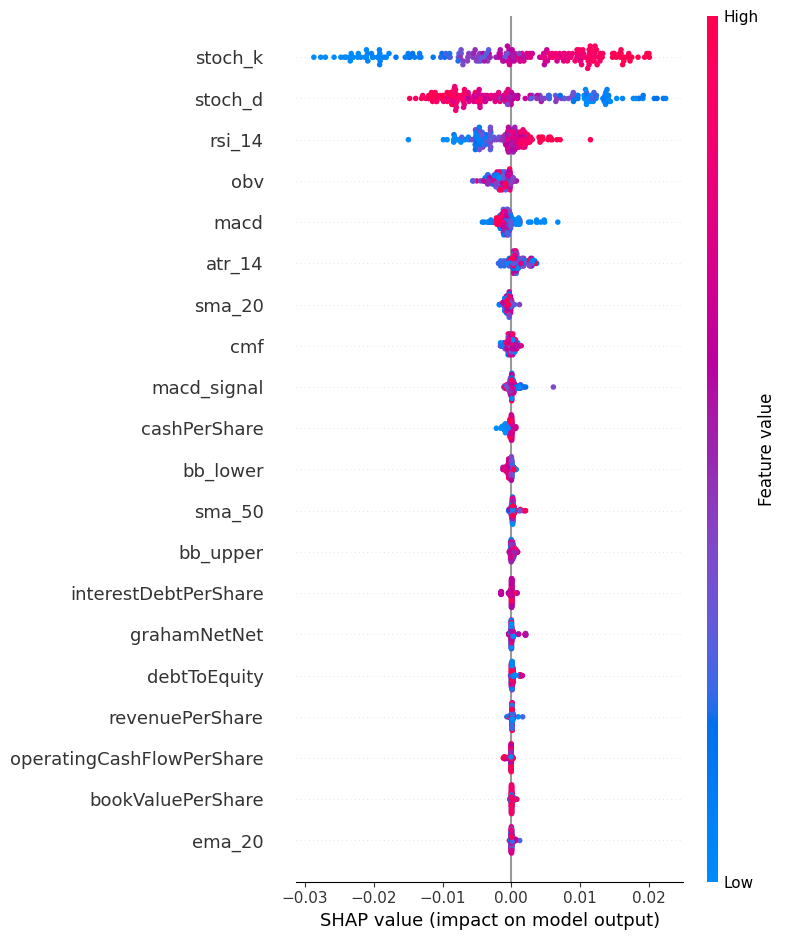

In [11]:
import shap
import xgboost as xgb

# Train the XGBoost model
params = {
    'objective': 'reg:squarederror', 
    'eval_metric': 'rmse'
}

# Train the model on the prepared data
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)

# Create the SHAP explainer based on your XGBoost model
explainer = shap.TreeExplainer(xgb_model)

# Get SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Visualize the feature importance using SHAP
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [12]:
# Cross-validation
cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, metrics={'rmse'}, early_stopping_rounds=10)
print(cv_results)


    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          0.014248        0.000304        0.015691       0.001831
1          0.012151        0.000244        0.014526       0.001525
2          0.010606        0.000383        0.013919       0.001337
3          0.009209        0.000422        0.013418       0.001367
4          0.008242        0.000427        0.013124       0.001357
5          0.007388        0.000329        0.012909       0.001404
6          0.006893        0.000335        0.012815       0.001405
7          0.006437        0.000353        0.012853       0.001455
8          0.005978        0.000303        0.012810       0.001516
9          0.005708        0.000355        0.012803       0.001590
10         0.005309        0.000318        0.012675       0.001616
11         0.005035        0.000255        0.012609       0.001600


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

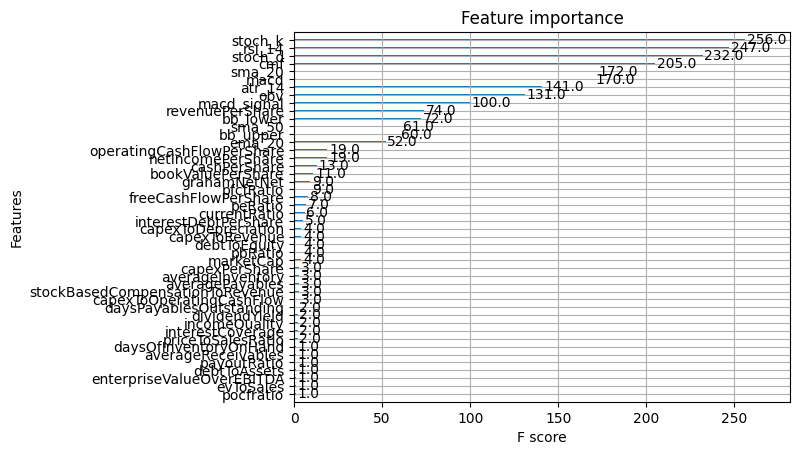

In [14]:
# Plot feature importance
xgb.plot_importance(xgb_model)


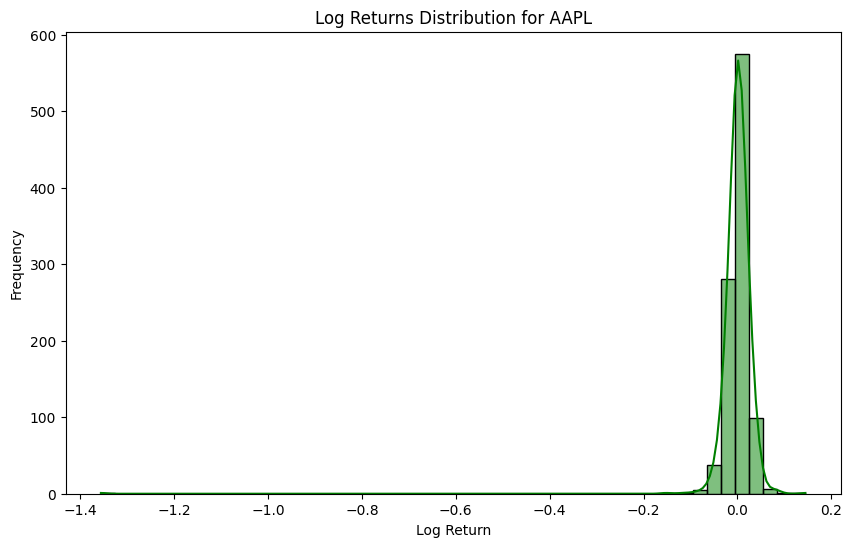

In [15]:
# Visualize Log Returns distribution
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: calculate log returns
def calculate_log_returns(df):
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))
    df = df.dropna(subset=['log_return'])
    return df

# Retrieve data for a specific ticker (as an example, assuming you already have this)
ticker = 'AAPL'
start_date = '2019-01-01'
end_date = '2022-12-31'

# Fetch data using the combiner (assuming combiner is already initialized)
data = comb.get_comb_data_from_postgresql(ticker, start_date, end_date)
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# Calculate log returns
df = calculate_log_returns(df)

# Plot the distribution of log returns
plt.figure(figsize=(10, 6))
sns.histplot(df['log_return'], bins=50, kde=True, color='green')
plt.title(f'Log Returns Distribution for {ticker}')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()


# Backtesting

In [ ]:
initial_cash = 100000  # Starting cash
position = 0  # Current position (number of shares)
cash = initial_cash  # Cash on hand

# Assuming 'best_model' is the loaded XGBoost model and 'X_test' is the feature matrix for testing
y_pred = best_model.predict(X_test)  # This is your 'predictions' variable

# Use next day's open price for trading
for i in range(len(y_pred) - 1):  # Stop at the second-to-last day to avoid index errors
    next_open = open_prices[i + 1]  # 'open_prices' contains the next day's opening prices

    if y_pred[i] > 0:  # Buy signal
        num_shares = cash // next_open
        position += num_shares
        cash -= num_shares * next_open
    elif y_pred[i] < 0 and position > 0:  # Sell signal
        cash += position * next_open
        position = 0  # Reset after selling

# Calculate final portfolio value
portfolio_value = cash + position * open_prices[-1]

